In [367]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
from tqdm import tqdm

In [368]:
import matplotlib # 글자 깨짐 방지 폰트설정
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [369]:
df = pd.read_csv("d:/IBA 동아리/data/funda_train.csv")

## 데이터

1. store_id - 상점의 고유 아이디
2. card_id - 사용한 카드의 고유 아이디(고객 id)
3. card_company - 비식별화된 카드 회사(카드 회사 id)
4. trasacted_date - 거래 날짜
5. trasacted_time - 거래 시간(시:분)
6. installment_term - 할부 개월 수
7. region - 상점의 지역
8. type_of_business - 상점의 업종
9. amount - 거래액

In [370]:
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [371]:
df['card_company'].value_counts()

a    1828556
b    1119323
c    1037085
d     774435
e     555645
f     525510
g     438877
h     277182
Name: card_company, dtype: int64

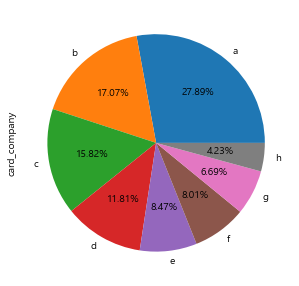

In [372]:
## 카드회사별 차지 비중 
plt.figure(figsize = (10,5))
df['card_company'].value_counts().plot.pie(autopct = '%.2f%%')
plt.show()

<AxesSubplot:xlabel='card_company'>

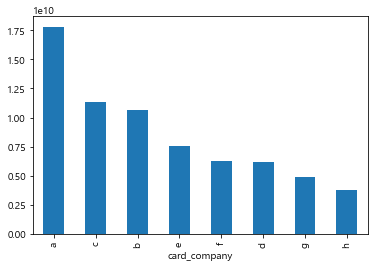

In [373]:
## 카드회사별 총 결제액 비중
df_card = df.groupby('card_company').sum()['amount'].sort_values(ascending = False)
df_card.plot.bar()

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [375]:
df.isnull().sum()

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [376]:
df.describe()

,store_id,card_id,installment_term,amount
count,6.556613e+06,6.556613e+06,6.556613e+06,6.556613e+06
mean,1.084930e+03,2.268127e+06,1.382017e-01,1.043511e+04
std,6.152183e+02,1.351058e+06,1.188152e+00,3.104031e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.771429e+06
25%,5.860000e+02,1.088828e+06,0.000000e+00,2.142857e+03
50%,1.074000e+03,2.239304e+06,0.000000e+00,4.285714e+03
75%,1.615000e+03,3.438488e+06,0.000000e+00,8.571429e+03
max,2.136000e+03,4.663856e+06,9.300000e+01,5.571429e+06


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [378]:
business = df[['type_of_business','amount']].groupby('type_of_business').mean().sort_values(by = 'amount',ascending = False)
business

,amount
type_of_business,
의약품 도매업,354632.638674
기타 산업용 농산물 도매업,276625.139388
경영 컨설팅업,150819.538148
일반 병원,135287.727565
"주방용품 및 가정용 유리, 요업 제품 소매업",95901.011149
...,...
비알코올 음료점업,1970.210406
떡류 제조업,1825.979464
체인화 편의점,1593.218107


- 평균 매출액 상하위 5개 직종

In [379]:
df[['type_of_business','amount']].groupby('type_of_business').sum().sort_values(by = 'amount',ascending = False)


,amount
type_of_business,
한식 음식점업,4.810450e+09
의복 소매업,2.403674e+09
의약품 도매업,1.568540e+09
일반 교과 학원,1.293611e+09
두발 미용업,1.087475e+09
...,...
예술품 및 골동품 소매업,3.172929e+06
"채소, 과실 및 뿌리작물 소매업",2.532857e+06
곡물 및 기타 식량작물 재배업,1.972814e+06


<AxesSubplot:>

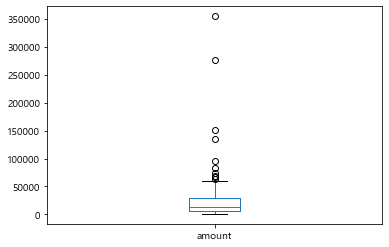

In [380]:
business.plot.box()

- 업종에 따른 평균 결제액의 차이가 있다

<AxesSubplot:xlabel='type_of_business'>

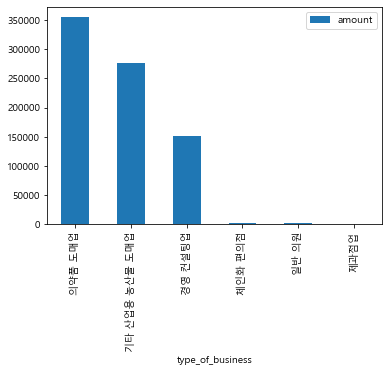

In [381]:
business.iloc[[0,1,2,-3,-2,-1]].plot.bar()

- 총 매출액 상하위 5개 직종

In [382]:
business2 = df[['type_of_business','installment_term']].groupby('type_of_business').mean()
business2.sort_values(by = 'installment_term',ascending = False)

,installment_term
type_of_business,
"주방용품 및 가정용 유리, 요업 제품 소매업",3.794918
의료용품 도매업,2.951256
기타 자동차 신품 부품 및 내장품 판매업,2.303795
그 외 기타 무점포 소매업,2.189600
가구 소매업,1.733131
...,...
일반 의원,0.000000
체인화 편의점,0.000000
문구용품 및 회화용품 소매업,0.000000


<AxesSubplot:>

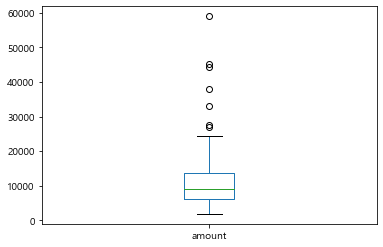

In [383]:
region = df[['region','amount']].groupby('region').mean()
region = region.sort_values(by = 'amount',ascending = False)
region.plot.box()

- 지역별로 평균 결제액이 차이가 있다

In [384]:
region2 = df[['region','installment_term']].groupby('region').mean()
region2.sort_values(by = 'installment_term',ascending = False)

,installment_term
region,
충북 옥천군,2.123711
전남 완도군,2.046990
경기 과천시,1.576261
경북 영천시,1.173145
대구 서구,0.979335
...,...
충북 진천군,0.002218
전남 곡성군,0.001775
전북 김제시,0.001082


<AxesSubplot:>

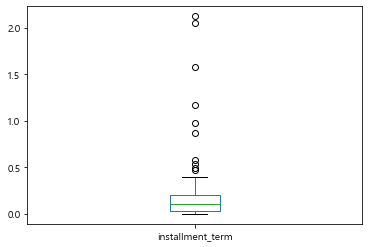

In [385]:
region2.plot.box()

- 지역별로 평균 할부 개월 수에 차이가 있으며 결제액보다 그 차이가 크다

In [386]:
df1 = df[['store_id','transacted_date']].groupby('store_id').count()
df2 = df[['store_id','amount']].groupby('store_id').mean()
df3 = pd.concat([df1,df2] , axis = 1)
df3.rename(columns = {'transacted_date':'visit_counts'})

,visit_counts,amount
store_id,,
0,4481,5394.883157
1,3782,970.027196
2,584,15142.123288
4,5830,5128.809115
5,1958,5547.315045
...,...,...
2132,6478,3493.964186
2133,6302,1751.849753
2134,2654,3069.894499


- 상점별 기간 내 총 고객 방문수와 평균 매출액

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [388]:
df['date']=df['transacted_date']+' '+df['transacted_time']
df['date']=pd.to_datetime(df['date'])

In [389]:
df.drop(['transacted_time','transacted_date'],axis =1,inplace = True)

In [390]:
df.set_index('date', inplace=True)

In [391]:
#월별로 resample
data_month=pd.DataFrame()
for i in tqdm(df.store_id.unique()):
    data_num=df[df.store_id==i]
    sum_amount=data_num['amount'].resample(rule='m').sum()
    data_mon=pd.concat([sum_amount],axis=1)
    data_mon.insert(0,'store_id',i)
    data_month=pd.concat([data_month,data_mon],axis=0)

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [00:33<00:00, 58.00it/s]


In [392]:
data_month

,store_id,amount
date,,
2016-06-30,0,7.470000e+05
2016-07-31,0,1.005000e+06
2016-08-31,0,8.715714e+05
2016-09-30,0,8.978571e+05
2016-10-31,0,8.354286e+05
...,...,...
2018-10-31,2136,2.012214e+06
2018-11-30,2136,2.135429e+06
2018-12-31,2136,2.427429e+06


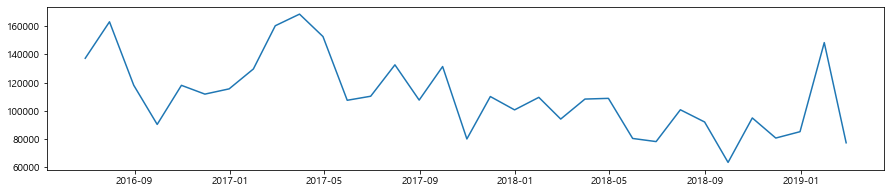

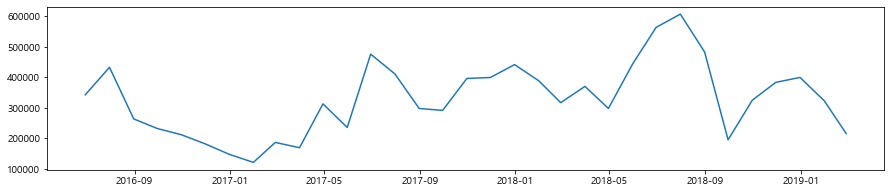

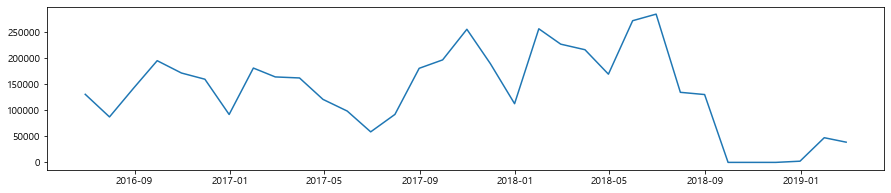

In [393]:
plt.figure(figsize=(15, 3))
plt.plot(data_month[data_month.store_id == 1].index, data_month[data_month.store_id == 1].amount)
plt.figure(figsize=(15, 3))
plt.plot(data_month[data_month.store_id == 5].index, data_month[data_month.store_id == 5].amount)
plt.figure(figsize=(15, 3))
plt.plot(data_month[data_month.store_id == 100].index, data_month[data_month.store_id == 100].amount)

- 기간에 따른 몇몇의 상점 매출 변화

In [394]:
df_first = df.groupby('store_id')['amount'].mean().sort_values(ascending = False)
df_first

store_id
538     354632.638674
1408    276625.139388
57      220696.478745
469     153436.040673
603     150819.538148
            ...      
758        860.696755
543        818.641635
1235       790.367199
1879       724.718956
1250       609.430163
Name: amount, Length: 1967, dtype: float64

In [395]:
df_first.describe()

count      1967.000000
mean      16245.321182
std       22278.969462
min         609.430163
25%        4577.813854
50%        8113.719547
75%       18594.217450
max      354632.638674
Name: amount, dtype: float64

<AxesSubplot:xlabel='sido'>

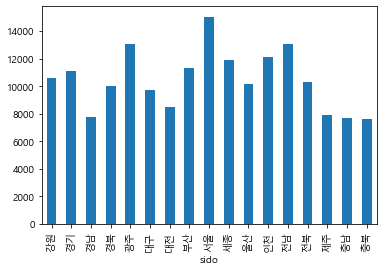

In [399]:
df['sido'] = df.region.str.split(' ').str[0]
df_sido = df.groupby('sido')['amount'].mean()
df_sido.plot.bar()

- 시도별 평균 결제액

In [401]:
df.sido.value_counts().sort_values(ascending = False)

경기    968836
서울    704437
경남    406190
부산    359042
경북    262338
충북    239796
충남    217040
대구    208424
인천    192439
강원    169791
전북    143514
대전    142478
울산    124640
전남    121978
광주    118015
제주    114671
세종     20218
Name: sido, dtype: int64